In [24]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
steps_date = pd.read_csv("ACTIVITY/ACTIVITY_1645282550549.csv")

In [5]:
steps_date.tail()

,date,steps,distance,runDistance,calories
242,2022-02-15,13118,8970,1159,296
243,2022-02-16,10837,7523,505,256
244,2022-02-17,13208,8675,503,278
245,2022-02-18,14781,10199,407,350
246,2022-02-19,9472,6595,437,224


In [6]:
steps_date["date"] = pd.to_datetime(steps_date["date"], format="%Y-%m-%d")

In [7]:
steps_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         247 non-null    datetime64[ns]
 1   steps        247 non-null    int64         
 2   distance     247 non-null    int64         
 3   runDistance  247 non-null    int64         
 4   calories     247 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 9.8 KB


In [8]:
steps_date.describe()

,steps,distance,runDistance,calories
count,247.000000,247.000000,247.000000,247.000000
mean,7761.619433,5179.117409,364.267206,172.611336
std,4583.555926,3097.806806,259.220222,103.240360
min,0.000000,0.000000,0.000000,0.000000
25%,4499.500000,2947.500000,203.500000,97.000000
50%,6964.000000,4645.000000,289.000000,155.000000
75%,10162.000000,6838.500000,494.500000,236.000000
max,22558.000000,15411.000000,1621.000000,505.000000


In [9]:
steps_date["distance"] = steps_date["distance"]/1000

In [10]:
steps_date["runDistance"] = steps_date["runDistance"]/1000

<AxesSubplot:xlabel='date', ylabel='calories'>

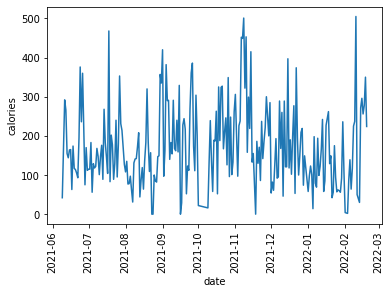

In [11]:
%matplotlib inline
plt.xticks(rotation=90)
sns.lineplot(x=steps_date["date"], y=steps_date["calories"])

                steps  distance  runDistance  calories
steps        1.000000  0.999081     0.580040  0.985172
distance     0.999081  1.000000     0.599172  0.989362
runDistance  0.580040  0.599172     1.000000  0.637195
calories     0.985172  0.989362     0.637195  1.000000


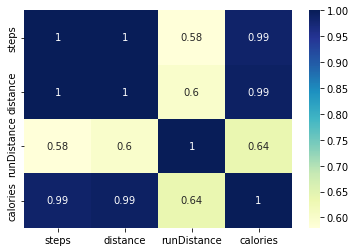

In [12]:
%matplotlib inline
corr = steps_date[["steps", "distance", "runDistance", "calories"]].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)
print(corr)

In [13]:
print(steps_date.head(10))

        date  steps  distance  runDistance  calories
0 2021-06-09   1875     1.229        0.063        42
1 2021-06-10   5370     3.610        0.149       172
2 2021-06-11   8793     5.917        0.318       292
3 2021-06-12   7875     5.232        0.290       266
4 2021-06-13   6486     4.271        0.376       155
5 2021-06-14   7181     4.646        0.232       144
6 2021-06-15   7091     4.662        0.283       164
7 2021-06-16   7543     5.056        0.275       165
8 2021-06-17   2736     1.776        0.157        63
9 2021-06-18   7900     5.373        0.217       174


In [23]:
max(steps_date["distance"])

steps_date.loc[steps_date["distance"]==15.411]

,date,steps,distance,runDistance,calories
238,2022-02-10,22558,15.411,0.88,505


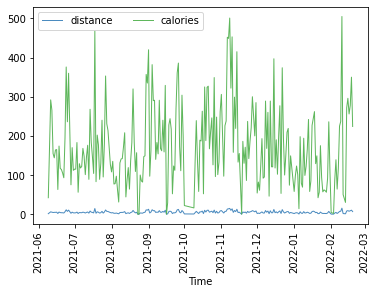

<Figure size 4320x2160 with 0 Axes>

In [21]:
%matplotlib inline
palette = plt.get_cmap('Set1')

# Plot multiple lines
num=0
for column in steps_date.drop(['date', 'steps', 'runDistance'], axis=1):
    num+=1
    plt.plot(steps_date['date'], steps_date[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.xticks(rotation=90)
plt.legend(loc=2, ncol=2)
plt.xlabel("Time")
plt.figure(figsize=(60, 30))
plt.show()

In [19]:
print(stats.trim_mean(steps_date['calories'], 0.1))
print(stats.median_abs_deviation(steps_date["calories"]))

print(stats.trim_mean(steps_date['steps'], 0.1))
print(stats.median_abs_deviation(steps_date["steps"]))

print(stats.trim_mean(steps_date['distance'], 0.1))
print(stats.median_abs_deviation(steps_date["distance"]))

163.49748743718592
64.0
7354.145728643216
2657.0
4.899256281407037
1.8350000000000009


In [26]:
print(np.std(steps_date["calories"]))
print(np.std(steps_date["distance"]))

103.03115931854164
3.0915295819797093


<AxesSubplot:>

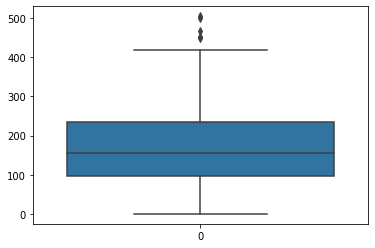

In [16]:
%matplotlib inline
sns.boxplot(data = steps_date["calories"])

In [17]:
print("this much % of date in outlier", end=": ")
print(round(len(steps_date.loc[steps_date["calories"]>=1.5*163.497])/len(steps_date["calories"])*100, 3), "%")

this much % of date in outlier: 21.053 %
